## Adding statistical significance to seaborn plots - By example

## Setup environment

##### Imports

In [44]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import scipy.stats as sci_stats
import seaborn as sns

##### A few helper functions

In [45]:
from utils import *

##### A few constants

Define some colors for categories or states plots

In [46]:
subcat_palette = sns.cubehelix_palette(start=0.2)
state_palette = sns.color_palette("Set2")

states_order = ["Successful", "Failed", "Live", "Suspended", "Canceled"]
subcat_order = ['DIY Electronics', '3D Printing', 'Sound']

## Prepare data

In [47]:
dataset = pd.read_csv("kickstarter_projects.csv")
dataset.head()

,ID,Name,Category,Subcategory,Country,Launched,Deadline,Goal,Pledged,Backers,State
0,1860890148,Grace Jones Does Not Give A F$#% T-Shirt (limi...,Fashion,Fashion,United States,2009-04-21 21:02:48,2009-05-31,1000,625,30,Failed
1,709707365,CRYSTAL ANTLERS UNTITLED MOVIE,Film & Video,Shorts,United States,2009-04-23 00:07:53,2009-07-20,80000,22,3,Failed
2,1703704063,drawing for dollars,Art,Illustration,United States,2009-04-24 21:52:03,2009-05-03,20,35,3,Successful
3,727286,Offline Wikipedia iPhone app,Technology,Software,United States,2009-04-25 17:36:21,2009-07-14,99,145,25,Successful
4,1622952265,Pantshirts,Fashion,Fashion,United States,2009-04-27 14:10:39,2009-05-26,1900,387,10,Failed


### I like Tech

In [48]:
tech = dataset.loc[(dataset.Category=="Technology"), :]
print_n_projects(tech)

There are 32562 projects in the dataset.


##### Number of projects by `Subcategory`

In [49]:
print_projects_by(tech, "ID", "count")

Technology           6.93e+03
Apps                 6.34e+03
Web                  3.91e+03
Hardware             3.66e+03
Software             3.05e+03
Gadgets              2.96e+03
Wearables            1.23e+03
DIY Electronics      9.02e+02
3D Printing          6.82e+02
Sound                6.69e+02
Robots               5.72e+02
Flight               4.26e+02
Camera Equipment     4.16e+02
Space Exploration    3.23e+02
Fabrication Tools    2.50e+02
Makerspaces          2.38e+02


There are over 30,000 technology projects in the dataset. 
The largest subcategory is `Technology` (no further refined), with almost 7,000 registered projects, while the smallest, `Makerspaces` has 238.

##### Total Goal amounts by `Subcategory`

In [50]:
print_projects_by(tech, "Goal", "sum")

Technology           1.11e+09
Apps                 4.49e+08
Web                  4.00e+08
Hardware             3.43e+08
Software             2.85e+08
Gadgets              1.55e+08
Wearables            7.47e+07
DIY Electronics      1.81e+07
Sound                3.12e+07
3D Printing          3.18e+07
Robots               1.07e+08
Flight               5.93e+07
Camera Equipment     1.66e+07
Space Exploration    1.86e+08
Fabrication Tools    2.90e+07
Makerspaces          3.11e+07


The total objective amount for projects by category follows almost the same ranking, except for `Sound` projects, which have a larger total than 3D Printing projects, even as there are fewer of them.

#### Let's have a closer look to these categories: `DIY Electronics`, `3D Printing`, `Sound` (`d3s`)
I'd like to know more about this apparent difference, don't you ? 

In [51]:
d3s = tech.loc[(tech.Subcategory.isin(("DIY Electronics", "3D Printing", "Sound"))), :]

print_n_projects(d3s, "d3s")

There are 2253 projects in d3s.


#### PLOT 1

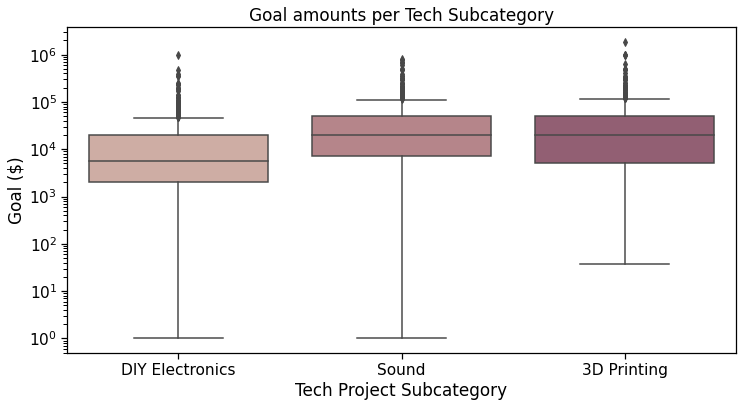

In [52]:
def get_plot1():
    with sns.plotting_context("notebook", font_scale = 1.4):
        new_ax = get_log_ax()
        sns.boxplot(ax=new_ax, data=d3s, x='Subcategory', y='Goal', palette=subcat_palette[1:])
        label_plot_for_subcat(new_ax)
        plt.show()
        return new_ax
ax = get_plot1()

#### PLOT 2

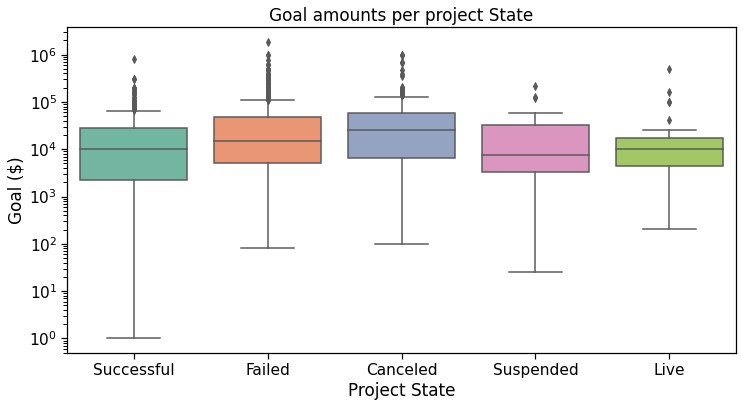

In [53]:
def get_plot2():
    with sns.plotting_context("notebook", font_scale = 1.4):
        new_ax = get_log_ax()

        sns.boxplot(ax=new_ax, data=d3s, x='State', y='Goal', palette=state_palette)

        label_plot_for_state(new_ax)
        plt.show()
ax = get_plot2()

#### So, are these values `statistically` different ?

### Prepare arrays for `scipy`

###### By `Subcategory`

In [54]:
electronics = d3s.loc[(d3s.Subcategory == "DIY Electronics"), "Goal"].values
printing = d3s.loc[(d3s.Subcategory == "3D Printing"), "Goal"].values
sound = d3s.loc[(d3s.Subcategory == "Sound"), "Goal"].values

log_electronics = np.log(electronics)
log_printing = np.log(printing)
log_sound = np.log(sound)

describe_array(electronics, "DIY Electronics")
describe_array(printing, "3D Printing")
describe_array(sound, "Sound")
print()
describe_array(log_electronics, "Log(DIY Electronics)")
describe_array(log_printing, "Log(3D Printing)")
describe_array(log_sound, "Log(Sound)")

"DIY Electronics"   Number of projects: 902	Min: 1.00	Max: 1000000.00	Avg: 20044.65	Median: 5.66e+03
"3D Printing"       Number of projects: 682	Min: 37.00	Max: 1853253.00	Avg: 46656.20	Median: 1.97e+04
"Sound"             Number of projects: 669	Min: 1.00	Max: 800000.00	Avg: 46710.19	Median: 2.00e+04

"Log(DIY Electronics)"Number of projects: 902	Min: 0.00	Max: 13.82	Avg: 8.68	Median: 8.64e+00
"Log(3D Printing)"  Number of projects: 682	Min: 3.61	Max: 14.43	Avg: 9.68	Median: 9.89e+00
"Log(Sound)"        Number of projects: 669	Min: 0.00	Max: 13.59	Avg: 9.79	Median: 9.90e+00


#### Test normality

In [55]:
print("DIY Electronics: ", sci_stats.normaltest(electronics))
print("3D printing: ", sci_stats.normaltest(printing))
print("Sound: ", sci_stats.normaltest(sound))
print()
print("Log(electronics): ", sci_stats.normaltest(log_electronics))
print("Log(3D printing): ", sci_stats.normaltest(log_printing))
print("Log(Sound): ", sci_stats.normaltest(log_sound))

DIY Electronics:  NormaltestResult(statistic=1521.3743649696216, pvalue=0.0)
3D printing:  NormaltestResult(statistic=1082.2551732301945, pvalue=9.801106931556437e-236)
Sound:  NormaltestResult(statistic=709.4121986641935, pvalue=8.976320746933668e-155)

Log(electronics):  NormaltestResult(statistic=13.803140782976556, pvalue=0.0010062040534031388)
Log(3D printing):  NormaltestResult(statistic=25.224644013193576, pvalue=3.330720181625079e-06)
Log(Sound):  NormaltestResult(statistic=97.03273110503234, pvalue=8.503743627935909e-22)


That's mostly no, let's apply Mann Whitney U test

In [56]:
# pvalues with scipy:
stat_results = [sci_stats.mannwhitneyu(electronics, printing, alternative="two-sided"),
                sci_stats.mannwhitneyu(printing, sound, alternative="two-sided"),
                sci_stats.mannwhitneyu(electronics, sound, alternative="two-sided")]

print("DIY Electronics vs 3D Printing: ", stat_results[0])
print("3D printing vs Sound: ", stat_results[1])
print("Electronics vs Sound: ", stat_results[2])

pvalues = [result.pvalue for result in stat_results]

DIY Electronics vs 3D Printing:  MannwhitneyuResult(statistic=200995.5, pvalue=2.839218291818886e-32)
3D printing vs Sound:  MannwhitneyuResult(statistic=219168.5, pvalue=0.2112833181056456)
Electronics vs Sound:  MannwhitneyuResult(statistic=184904.0, pvalue=1.914478730136443e-39)


Remember the plot

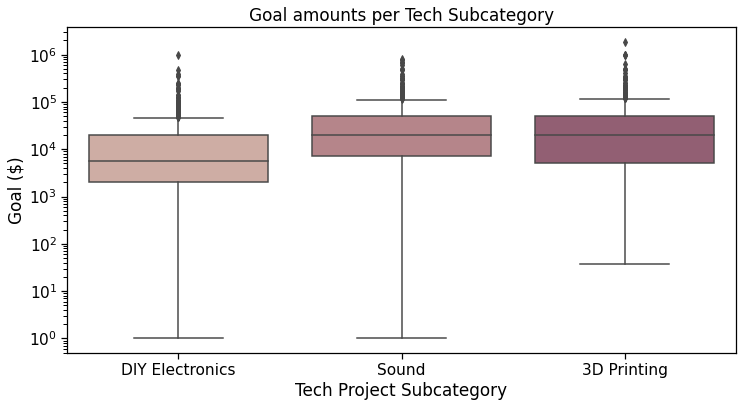

In [57]:
ax = get_plot1()

So how to add the statistical significance (pvalues) on there ?
There are a few options that you could find, requiring to code quite a few lines. You'll find them if you look for them.

Instead, I'm going to present you `statannotations`.

## What is `statannotations` ?

`Statannotations` is a packaged that evolved from `statannot`, providing an improved API and added features to add statistical significance annotations onto seaborn categorical plots (`barplot`, `boxplot`, `stripplot`, `swarmplot`, and `violinplot`)

How so ?

###### First and foremost

In [58]:
from statannotations.Annotator import Annotator

The general pattern is

1. Instanciate an Annotator (or reuse, we'll cover that later).


2. Configure it (text formatting, statistical test, multiple comparisons correction method...)


3. Make the annotations (we'll cover these cases)

    - By providing completely custom annotations (A)
    - By providing pvalues to be formatted before being added to the plot (B)
    - By applying a configured test (C)


4. Annotate !

### A - Let's use our test results, since we have them

If we already have a seaborn plot (and its associated `ax`), and statistical results, or any other text we would like to display on the plot, steps are quite limited. 


**STEP 1**: The annotator

In this step, you have to pass which boxes (or bars, violins, etc) you want to annotate in a `box_pairs` parameter.  
In this case, it is the equivalent of `'DIY Electronics vs 3D printing'` and others.

For statannotations, we specify this as 

```python
box_pairs = [('DIY Electronics', '3D Printing'),  # 'DIY Electronics' vs '3D printing'
             ('3D Printing', 'Sound'),            # '3D printing' vs 'Sound'
             ('DIY Electronics', 'Sound')]        # 'DIY Electronics' vs 'Sound'

# We now have all we need to instantiate the annotator
annotator = Annotator(ax, box_pairs, ...)  # With ... = all parameters passed to seaborn's plotter
```

**STEP 2**: In this first example, we will not configure anything.  

**STEP 3**: We'll then add the raw pvalues from scipy's returned values
```python
pvalues = [sci_stats.mannwhitneyu(electronics, printing, alternative="two-sided").pvalue,
           sci_stats.mannwhitneyu(printing, sound, alternative="two-sided").pvalue,
           sci_stats.mannwhitneyu(electronics, sound, alternative="two-sided").pvalue]
```
using
```python 
annotator.set_custom_annotations(pvalues)
```
**STEP 4**: Annotate !
```python
annotator.annotate()
```
! Make sure the order of box pairs and annotations (pvalues here) match

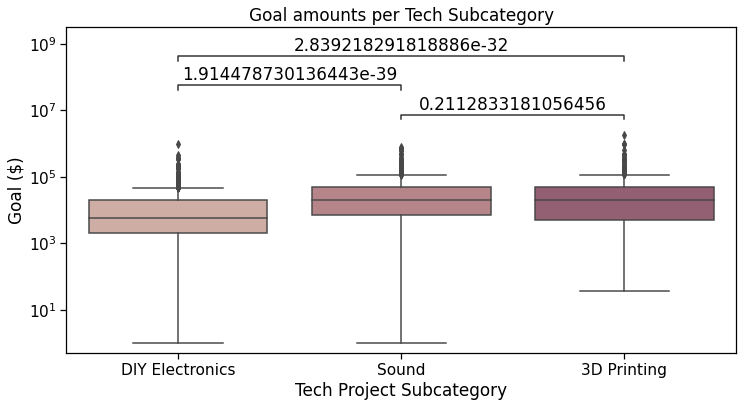

In [59]:
with sns.plotting_context("notebook", font_scale = 1.4):
    ax = get_log_ax()
    
    # Putting the parameters in a dictionary avoids duplication
    plotting_parameters = {
        'data': d3s,
        'x': 'Subcategory',
        'y': 'Goal',
        'palette': subcat_palette[1:]
    }
    
    box_pairs = [('DIY Electronics', '3D Printing'), 
                 ('3D Printing', 'Sound'),
                 ('DIY Electronics', 'Sound')]
    
    sns.boxplot(**plotting_parameters)

    annotator = Annotator(ax, box_pairs, **plotting_parameters)
    annotator.set_custom_annotations(pvalues)
    annotator.annotate()
    label_plot_for_subcat(ax)

    plt.show()


### B - Let's format these pvalues for prettier result

We will use `set_pvalues` instead of `set_custom_annotations` to benefit from formatting options

#### With the star notation

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Sound v.s. 3D Printing: Custom statistical test, P_val:2.113e-01
DIY Electronics v.s. Sound: Custom statistical test, P_val:1.914e-39
DIY Electronics v.s. 3D Printing: Custom statistical test, P_val:2.839e-32


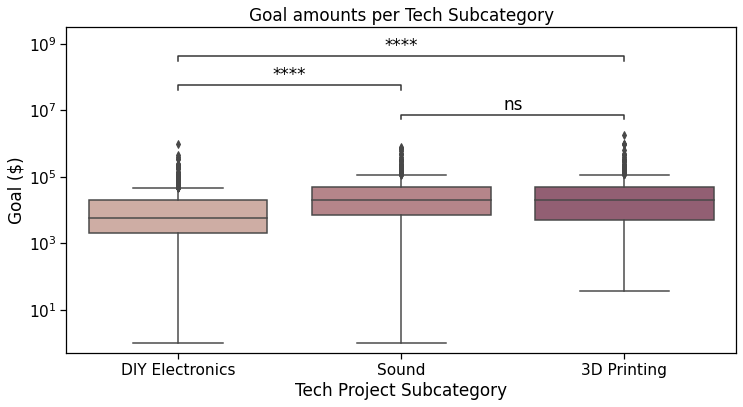

In [60]:
with sns.plotting_context("notebook", font_scale = 1.4):
    ax = get_log_ax()
    
    sns.boxplot(ax=ax, **plotting_parameters)

    annotator = Annotator(ax, box_pairs, **plotting_parameters)
    annotator.set_pvalues(pvalues)
    annotator.annotate()
    
    label_plot_for_subcat(ax)

    plt.show()

#### With a simple format to display significance

In this case, we will configure `text_format` to `simple` to show a summary of pvalues.

Sound v.s. 3D Printing: Custom statistical test, P_val:2.113e-01
DIY Electronics v.s. Sound: Custom statistical test, P_val:1.914e-39
DIY Electronics v.s. 3D Printing: Custom statistical test, P_val:2.839e-32


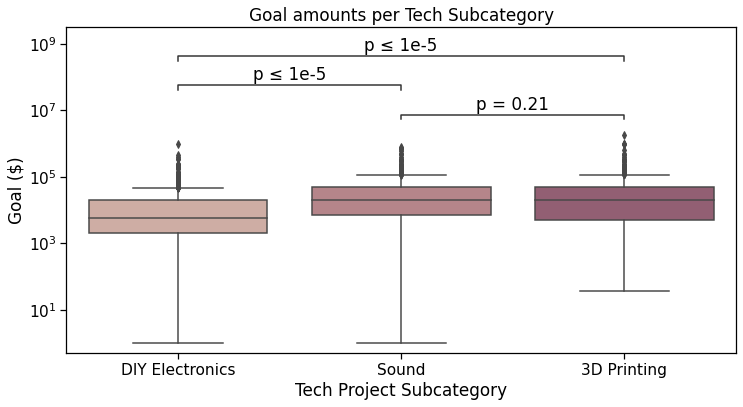

In [61]:
with sns.plotting_context("notebook", font_scale = 1.4):
    ax = get_log_ax()
    
    sns.boxplot(ax=ax, **plotting_parameters)

    annotator = Annotator(ax, box_pairs, **plotting_parameters)
    annotator.configure(text_format="simple")
    annotator.set_pvalues(pvalues).annotate()
    
    label_plot_for_subcat(ax)

    plt.show()

We can also provide a `test_short_name` parameter to be displayed right before the pvalue.  

I'll also show how to reduce the code needed a bit more by reusing the annotator instance, 
since we are not changing the data and box_pairs. This will also remember our `text_format` option configured.

Sound v.s. 3D Printing: Custom statistical test, P_val:2.113e-01
DIY Electronics v.s. Sound: Custom statistical test, P_val:1.914e-39
DIY Electronics v.s. 3D Printing: Custom statistical test, P_val:2.839e-32


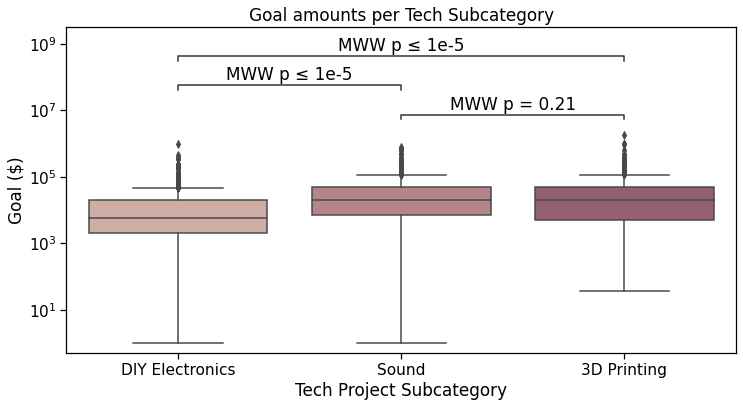

In [62]:
with sns.plotting_context("notebook", font_scale = 1.4):
    ax = get_log_ax()
    
    sns.boxplot(ax=ax, **plotting_parameters)

    annotator.new_plot(ax, **plotting_parameters)  # Same box_pairs and data, we can keep the annotator
    annotator.configure(test_short_name="MWW")     # text_format is still simple
    annotator.set_pvalues_and_annotate(pvalues)    # in one function call
    
    label_plot_for_subcat(ax)

    plt.show()

#### Tweak the layout

I would like to see more space between the annotations and the text.

The `annotate` method allows to parameters to do just that

Sound v.s. 3D Printing: Custom statistical test, P_val:2.113e-01
DIY Electronics v.s. Sound: Custom statistical test, P_val:1.914e-39
DIY Electronics v.s. 3D Printing: Custom statistical test, P_val:2.839e-32


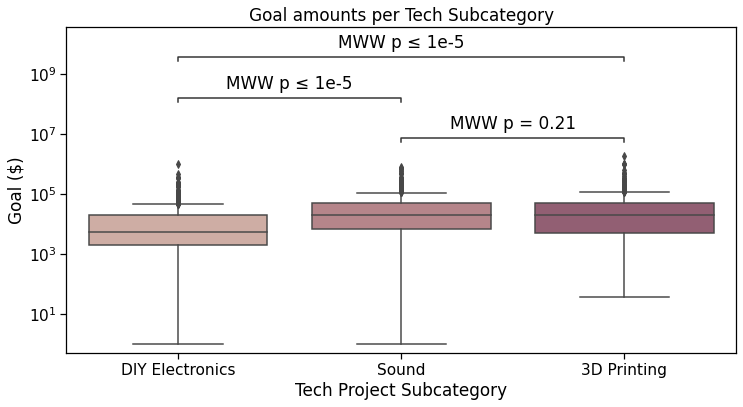

In [63]:
with sns.plotting_context("notebook", font_scale = 1.4):
    ax = get_log_ax()
    
    sns.boxplot(ax=ax, **plotting_parameters)

    annotator.new_plot(ax, **plotting_parameters)  # Same box_pairs and data, we can keep the annotator
    annotator.configure(text_offset = 5)
    annotator.set_pvalues(pvalues)                 # Now, test_short_name is also remembered
    annotator.annotate()
    
    label_plot_for_subcat(ax)

    plt.show()

But you can let `statannotations` take care of most of these steps, run the test and annotate

Sound v.s. 3D Printing: Mann-Whitney-Wilcoxon test two-sided, P_val:2.113e-01 U_stat=2.371e+05
DIY Electronics v.s. Sound: Mann-Whitney-Wilcoxon test two-sided, P_val:1.914e-39 U_stat=1.849e+05
DIY Electronics v.s. 3D Printing: Mann-Whitney-Wilcoxon test two-sided, P_val:2.839e-32 U_stat=2.010e+05


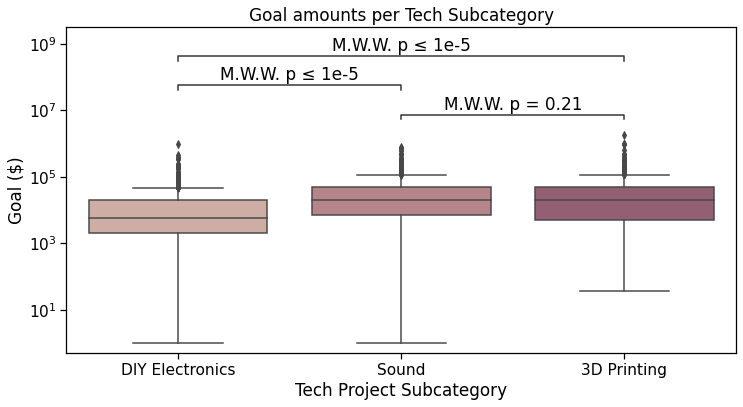

In [64]:
with sns.plotting_context("notebook", font_scale = 1.4):
    ax = get_log_ax()
    
    sns.boxplot(ax=ax, **plotting_parameters)
    
    annotator = Annotator(ax, box_pairs=box_pairs, **plotting_parameters)
    annotator.configure(test="Mann-Whitney", text_format="simple").apply_and_annotate()
    
    label_plot_for_subcat(ax)

    plt.show()

There is also the `"full"` format for annotations

Sound v.s. 3D Printing: Mann-Whitney-Wilcoxon test two-sided, P_val:2.113e-01 U_stat=2.371e+05
DIY Electronics v.s. Sound: Mann-Whitney-Wilcoxon test two-sided, P_val:1.914e-39 U_stat=1.849e+05
DIY Electronics v.s. 3D Printing: Mann-Whitney-Wilcoxon test two-sided, P_val:2.839e-32 U_stat=2.010e+05


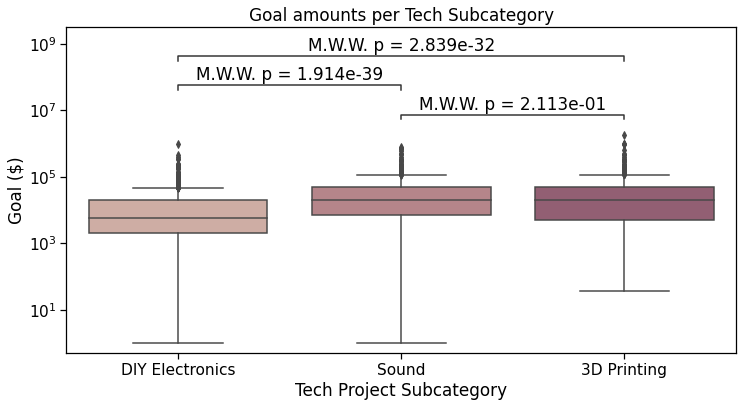

In [65]:
with sns.plotting_context("notebook", font_scale = 1.4):
    ax = get_log_ax()

    sns.boxplot(ax=ax, **plotting_parameters)

    annotator.new_plot(ax, **plotting_parameters)
    annotator.configure(text_format="full").apply_and_annotate()

    label_plot_for_subcat(ax)

    plt.show()

###### And that plot by `State` ?

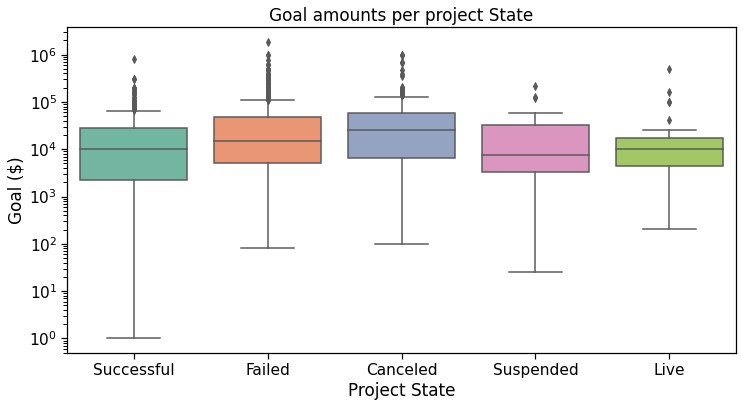

In [66]:
# Remember
get_plot2()

Say we're interested in comparing 'Successful', 'Failed', 'Cancelled' and 'Live' states

In [67]:
values = d3s.loc[(d3s.State == "Successful"), "Goal"].values
describe_array(values, "Successful")
print(sci_stats.normaltest(values))

log_values = np.log(d3s.loc[(d3s.State == "Successful"), "Goal"].values)
describe_array(values, "Log(Successful)")
print(sci_stats.normaltest(log_values))

"Successful"        Number of projects: 933	Min: 1.00	Max: 800000.00	Avg: 22195.41	Median: 1.00e+04
NormaltestResult(statistic=1458.9137220178004, pvalue=0.0)
"Log(Successful)"   Number of projects: 933	Min: 1.00	Max: 800000.00	Avg: 22195.41	Median: 1.00e+04
NormaltestResult(statistic=63.90130331674805, pvalue=1.3304798192714246e-14)


We will need to define the new box_pairs to compare, then apply the same method to configure, get test results and annotate the plot.

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Successful v.s. Failed: Mann-Whitney-Wilcoxon test two-sided, P_val:2.164e-14 U_stat=3.661e+05
Failed v.s. Canceled: Mann-Whitney-Wilcoxon test two-sided, P_val:9.031e-04 U_stat=1.193e+05
Successful v.s. Canceled: Mann-Whitney-Wilcoxon test two-sided, P_val:2.280e-16 U_stat=8.807e+04
Canceled v.s. Live: Mann-Whitney-Wilcoxon test two-sided, P_val:7.298e-03 U_stat=5.595e+03
Failed v.s. Live: Mann-Whitney-Wilcoxon test two-sided, P_val:1.150e-01 U_stat=1.777e+04
Successful v.s. Live: Mann-Whitney-Wilcoxon test two-sided, P_val:7.274e-01 U_stat=1.393e+04


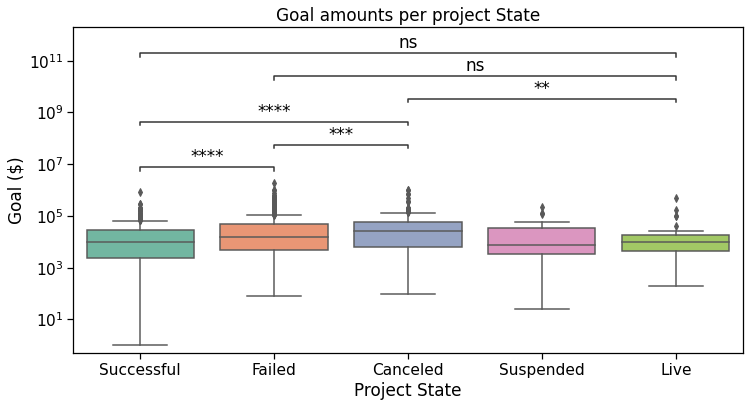

In [68]:
box_pairs = [
    ("Successful", "Failed"),
    ("Successful", "Live"),
    ("Failed", "Live"),
    ("Canceled", "Successful"),
    ("Canceled", "Failed"),
    ("Canceled", "Live"),
]

with sns.plotting_context("notebook", font_scale = 1.4):
    ax = get_log_ax()
    state_plot_params = {
        'data': d3s,
        'x': 'State',
        'y': 'Goal',
        'palette': state_palette
    }
    sns.boxplot(ax=ax, **state_plot_params)

    annotator = Annotator(ax, box_pairs, **state_plot_params)
    annotator.configure(test="Mann-Whitney").apply_and_annotate()

    label_plot_for_state(ax)
    plt.show()

Now, that's a pretty plot !

If you are worried about multiple testing and correction methods, read on !

But first, let's see what happends with two levels of categorization, box plots with hue.

### Boxplots with hue

We are also going to work on these two plots of the same data

#### PLOT 3

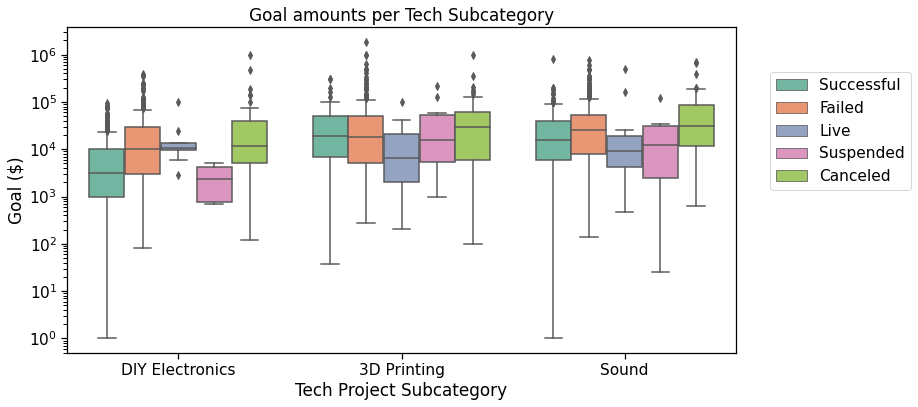

In [69]:
with sns.plotting_context("notebook", font_scale = 1.4):

    ax = get_log_ax()
    ax = sns.boxplot(ax=ax,
                     data=d3s,
                     x='Subcategory', y='Goal', 
                     order=subcat_order,
                     hue="State", 
                     hue_order=states_order, 
                     palette=state_palette)

    add_legend(ax)
    label_plot_for_subcat(ax)
    plt.show()

I'd like to compare "Successful" and "Failed" and "Live" states in the 3 subcategories.
Box pairs must then contain the information
about the subcategory and the state, and are defined as below

In [77]:
box_pairs = [
    [('DIY Electronics', 'Successful'), ('DIY Electronics', 'Failed')],
    [('3D Printing', 'Successful'), ('3D Printing', 'Failed')],
    [('Sound', 'Successful'), ('Sound', 'Failed')],

    [('DIY Electronics', 'Successful'), ('DIY Electronics', 'Live')],
    [('3D Printing', 'Successful'), ('3D Printing', 'Live')],
    [('Sound', 'Successful'), ('Sound', 'Live')],

    [('DIY Electronics', 'Failed'), ('DIY Electronics', 'Live')],
    [('3D Printing', 'Failed'), ('3D Printing', 'Live')],
    [('Sound', 'Failed'), ('Sound', 'Live')],
]

again, putting plot parameters in a dictionnary so we can use it twice, then using the Annotator

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Sound_Failed v.s. Sound_Live: Mann-Whitney-Wilcoxon test two-sided, P_val:5.311e-02 U_stat=2.534e+03
DIY Electronics_Successful v.s. DIY Electronics_Failed: Mann-Whitney-Wilcoxon test two-sided, P_val:1.381e-16 U_stat=5.240e+04
DIY Electronics_Failed v.s. DIY Electronics_Live: Mann-Whitney-Wilcoxon test two-sided, P_val:5.575e-01 U_stat=1.514e+03
3D Printing_Successful v.s. 3D Printing_Failed: Mann-Whitney-Wilcoxon test two-sided, P_val:6.081e-01 U_stat=3.845e+04
3D Printing_Failed v.s. 3D Printing_Live: Mann-Whitney-Wilcoxon test two-sided, P_val:1.118e-01 U_stat=1.734e+03
Sound_Successful v.s. Sound_Failed: Mann-Whitney-Wilcoxon test two-sided, P_val:1.222e-03 U_stat=3.191e+04
DIY Electronics_Successful v.s. DIY Electronics_Live: Mann-Whitney-Wilcoxon test two-sided, P_val:1.011e-02 U_stat=9.365e+02
3D Pri

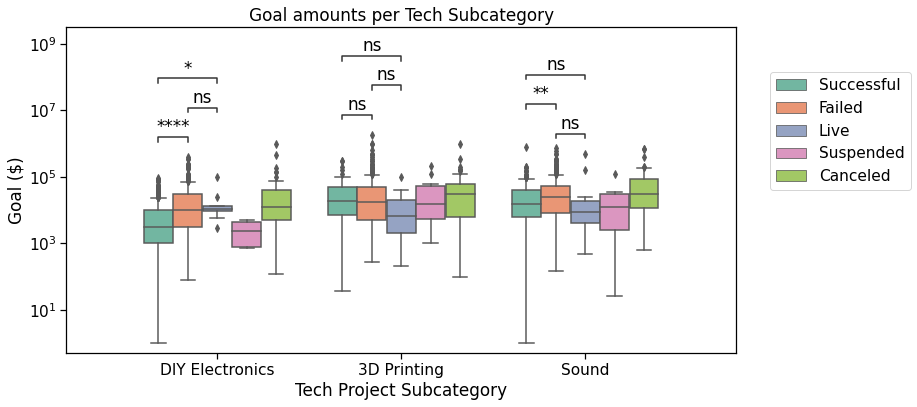

In [78]:
hue_plot_params = {
    'data': d3s,
    'x': 'Subcategory',
    'y': 'Goal',
    "order": subcat_order,
    "hue": "State",
    "hue_order": states_order,
    "palette": state_palette
}

with sns.plotting_context("notebook", font_scale = 1.4):

    ax = get_log_ax()
    ax = sns.boxplot(ax=ax, **hue_plot_params)
    annotator = Annotator(ax, box_pairs, **hue_plot_params)
    annotator.configure(test="Mann-Whitney").apply_and_annotate()

    add_legend(ax)
    label_plot_for_subcat(ax)
    plt.show()

#### PLOT 4 
To compare the states, across categories, let's plot it differently

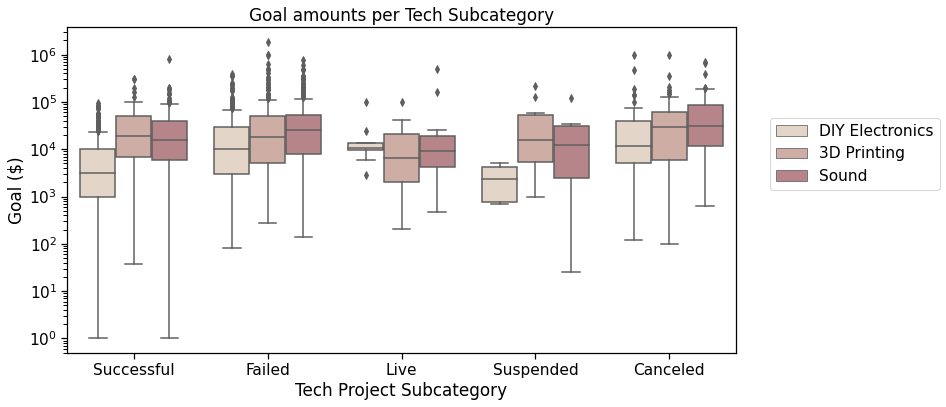

In [72]:
with sns.plotting_context("notebook", font_scale = 1.4):

    ax = get_log_ax()
    ax = sns.boxplot(ax=ax,
                     data=d3s, 
                     x='State', y='Goal', 
                     order=states_order,
                     hue="Subcategory", 
                     hue_order=subcat_order, 
                     palette=subcat_palette)

    add_legend(ax)
    label_plot_for_subcat(ax)
    plt.show()

p-value annotation legend:
      ns: p <= 1.00e+00
       *: 1.00e-02 < p <= 5.00e-02
      **: 1.00e-03 < p <= 1.00e-02
     ***: 1.00e-04 < p <= 1.00e-03
    ****: p <= 1.00e-04

Failed_3D Printing v.s. Failed_Sound: Mann-Whitney-Wilcoxon test two-sided, P_val:5.552e-02 U_stat=4.107e+04
Live_DIY Electronics v.s. Live_3D Printing: Mann-Whitney-Wilcoxon test two-sided, P_val:3.601e-01 U_stat=4.600e+01
Live_3D Printing v.s. Live_Sound: Mann-Whitney-Wilcoxon test two-sided, P_val:5.618e-01 U_stat=4.700e+01
Successful_DIY Electronics v.s. Successful_3D Printing: Mann-Whitney-Wilcoxon test two-sided, P_val:1.593e-26 U_stat=2.536e+04
Successful_3D Printing v.s. Successful_Sound: Mann-Whitney-Wilcoxon test two-sided, P_val:4.518e-01 U_stat=3.443e+04
Failed_DIY Electronics v.s. Failed_3D Printing: Mann-Whitney-Wilcoxon test two-sided, P_val:8.126e-07 U_stat=4.862e+04
Live_DIY Electronics v.s. Live_Sound: Mann-Whitney-Wilcoxon test two-sided, P_val:5.923e-01 U_stat=7.200e+01
Failed_DIY Electro

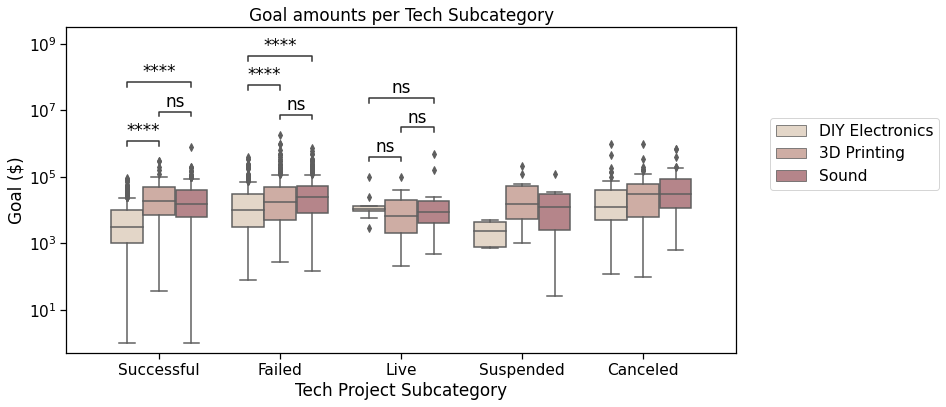

In [80]:
box_pairs =(
    [('Successful', 'DIY Electronics'), ('Successful', '3D Printing')],
    [('Successful', '3D Printing'), ('Successful', 'Sound')],
    [('Successful', 'DIY Electronics'), ('Successful', 'Sound')],

    [('Failed', 'DIY Electronics'), ('Failed', '3D Printing')],
    [('Failed', '3D Printing'), ('Failed', 'Sound')],
    [('Failed', 'DIY Electronics'), ('Failed', 'Sound')],
    
    [('Live', 'DIY Electronics'), ('Live', '3D Printing')],
    [('Live', '3D Printing'), ('Live', 'Sound')],
    [('Live', 'DIY Electronics'), ('Live', 'Sound')],
)

# Switching hue and x
hue_plot_params = {
    'data': d3s,
    'x': 'State',
    'y': 'Goal',
    "order": states_order,
    "hue": "Subcategory",
    "hue_order": subcat_order,
    "palette": subcat_palette
}

with sns.plotting_context("notebook", font_scale = 1.4):

    ax = get_log_ax()
    ax = sns.boxplot(ax=ax, **hue_plot_params)
    annotator = Annotator(ax, box_pairs, **hue_plot_params)
    annotator.configure(test="Mann-Whitney").apply_and_annotate()

    add_legend(ax)
    label_plot_for_subcat(ax)
    plt.show()